# **step1:Importing necessary libraries and loading the dataset**

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, scale, StandardScaler, OrdinalEncoder, LabelEncoder, RobustScaler
from scipy.stats import randint 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score, recall_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import time
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Importing the Credit Card Default Dataset
df = pd.read_csv('UCI_Credit_Card.csv')
df = df.sample(n=2000,replace =False,random_state=1)

In [11]:
df.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
10747  10748   310000.0    1          3         1   32      0      0      0   
12573  12574    10000.0    2          3         1   49     -1     -1     -2   
29676  29677    50000.0    1          2         1   28     -1     -1     -1   
8856    8857    80000.0    2          3         1   52      2      2      3   
21098  21099   270000.0    1          1         2   34      1      2      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
10747      0  ...    84373.0    57779.0    14163.0    8295.0    6000.0   
12573     -1  ...     1690.0     1138.0      930.0       0.0       0.0   
29676      0  ...    45975.0     1300.0    43987.0       0.0   46257.0   
8856       3  ...    40748.0    39816.0    40607.0    3700.0    1600.0   
21098      0  ...    22448.0    15490.0    17343.0       0.0    4000.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
10747    4000.0    3000.0    1000.0    2000.0                           0  
12573    2828.0       0.0     182.0       0.0                           1  
29676    2200.0    1300.0   43987.0    1386.0                           0  
8856     1600.0       0.0    1600.0    1600.0                           1  
21098    2000.0       0.0    2000.0    2000.0                           0  

[5 rows x 25 columns]

In [12]:
df.tail()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
23295  23296   160000.0    2          1         2   25     -1      0     -1   
15148  15149   250000.0    1          1         1   53     -2     -2     -2   
18666  18667    50000.0    2          1         2   23     -1     -1     -2   
3415    3416   200000.0    2          2         1   37      0      0      0   
18714  18715   420000.0    2          1         2   28      0      0     -1   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
23295     -1  ...     2199.0    10856.0        0.0    1000.0   11426.0   
15148     -2  ...        0.0        0.0        0.0       0.0       0.0   
18666     -2  ...        0.0        0.0        0.0       0.0       0.0   
3415       0  ...   191730.0   171269.0   151550.0    8017.0    8000.0   
18714      0  ...    65592.0    57438.0    31029.0    1010.0   64513.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
23295    2199.0   10000.0       0.0    9867.0                           0  
15148       0.0       0.0       0.0       0.0                           1  
18666       0.0       0.0       0.0       0.0                           0  
3415     8000.0    9000.0    7000.0    6000.0                           0  
18714    2420.0    1473.0    1062.0    1022.0                           0  

[5 rows x 25 columns]

In [13]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [14]:
SHOW_FIGURE = True

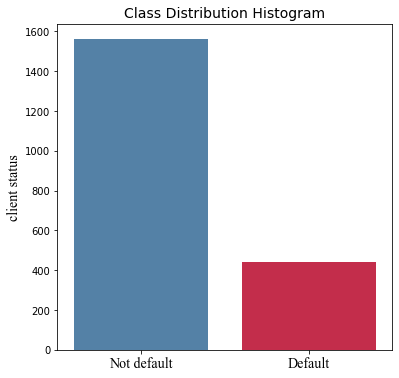

In [15]:
# Dataset balanced?
if SHOW_FIGURE :
    font = FontProperties()
    font.set_family(['Times New Roman', 'serif'])
    font.set_size(14)

    plt.figure(figsize = (6,6))
    sns.countplot('default.payment.next.month', data=df, palette=['steelblue','crimson'])
    plt.title('Class Distribution Histogram', fontsize=14)
    plt.xticks([0,1],['Not default','Default'],fontproperties=font)
    plt.ylabel('client status', fontproperties=font)
    plt.xlabel('')
    plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10747 to 18714
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2000 non-null   int64  
 1   LIMIT_BAL                   2000 non-null   float64
 2   SEX                         2000 non-null   int64  
 3   EDUCATION                   2000 non-null   int64  
 4   MARRIAGE                    2000 non-null   int64  
 5   AGE                         2000 non-null   int64  
 6   PAY_0                       2000 non-null   int64  
 7   PAY_2                       2000 non-null   int64  
 8   PAY_3                       2000 non-null   int64  
 9   PAY_4                       2000 non-null   int64  
 10  PAY_5                       2000 non-null   int64  
 11  PAY_6                       2000 non-null   int64  
 12  BILL_AMT1                   2000 non-null   float64
 13  BILL_AMT2                   

In [17]:
df.describe()

ID      LIMIT_BAL          SEX    EDUCATION     MARRIAGE  \
count   2000.000000    2000.000000  2000.000000  2000.000000  2000.000000   
mean   14950.749000  171825.000000     1.603000     1.853000     1.555000   
std     8624.251173  131598.930521     0.489398     0.798567     0.516825   
min        3.000000   10000.000000     1.000000     1.000000     0.000000   
25%     7404.000000   60000.000000     1.000000     1.000000     1.000000   
50%    14889.500000  140000.000000     2.000000     2.000000     2.000000   
75%    22510.250000  250000.000000     2.000000     2.000000     2.000000   
max    29993.000000  730000.000000     2.000000     6.000000     3.000000   

               AGE        PAY_0        PAY_2        PAY_3        PAY_4  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean     35.458000    -0.024500    -0.138500    -0.179500    -0.213000  ...   
std       9.144892     1.103861     1.163613     1.177698     1.166753  ...   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000  ...   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000  ...   
50%      34.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      41.000000     0.000000     0.000000     0.000000     0.000000  ...   
max      71.000000     6.000000     5.000000     8.000000     7.000000  ...   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    2000.000000    2000.000000    2000.000000    2000.000000   
mean    44390.095500   41502.586000   39643.917000    5153.111500   
std     65827.281839   61928.132672   60472.016246   13065.162427   
min    -81334.000000  -15306.000000  -51443.000000       0.000000   
25%      2939.500000    2158.750000    1319.250000    1000.000000   
50%     19454.000000   18652.000000   17621.500000    2022.500000   
75%     53394.250000   51005.500000   49484.750000    5000.000000   
max    487066.000000  489200.000000  513798.000000  276698.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.000000e+03    2000.000000    2000.000000    2000.000000   
mean   6.362411e+03    6096.214000    5091.073500    5043.292500   
std    4.014712e+04   21880.625777   16197.840731   16448.820691   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    9.947500e+02     445.500000     328.250000     260.250000   
50%    2.031500e+03    1843.000000    1597.500000    1500.000000   
75%    5.000000e+03    5000.000000    4295.500000    4207.750000   
max    1.684259e+06  400972.000000  331788.000000  379267.000000   

            PAY_AMT6  default.payment.next.month  
count    2000.000000                 2000.000000  
mean     5738.555500                    0.219500  
std     21310.318739                    0.414011  
min         0.000000                    0.000000  
25%       166.750000                    0.000000  
50%      1464.000000                    0.000000  
75%      4000.000000                    0.000000  
max    403500.000000                    1.000000  

[8 rows x 25 columns]

**There are 2000 distinct credit card clients.**

**The average value for the amount of credit card limit is 171,825. The standard deviation is unusually large, max value being 730,000.**

**Education Level is mostly graduate school and university.**

**Most of the clients are either married or single .**

**Average age is 35.5 years, with a standard deviation of 9.2**

**As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).**

In [18]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [19]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [20]:
# Check if there is any duplicate IDs
condition = bool(df.duplicated(subset = 'ID').any())

if condition:
    print('There are duplicate IDs')
else:
    print('No duplicate IDs')

No duplicate IDs


In [21]:
df['SEX'].value_counts(dropna=False)

2    1206
1     794
Name: SEX, dtype: int64

In [22]:
df['EDUCATION'].value_counts(dropna=False)

2    925
1    715
3    325
5     18
4     13
6      4
Name: EDUCATION, dtype: int64

In [23]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
10747  10748   310000.0    1          3         1   32      0      0      0   
12573  12574    10000.0    2          3         1   49     -1     -1     -2   
29676  29677    50000.0    1          2         1   28     -1     -1     -1   
8856    8857    80000.0    2          3         1   52      2      2      3   
21098  21099   270000.0    1          1         2   34      1      2      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
10747      0  ...    84373.0    57779.0    14163.0    8295.0    6000.0   
12573     -1  ...     1690.0     1138.0      930.0       0.0       0.0   
29676      0  ...    45975.0     1300.0    43987.0       0.0   46257.0   
8856       3  ...    40748.0    39816.0    40607.0    3700.0    1600.0   
21098      0  ...    22448.0    15490.0    17343.0       0.0    4000.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
10747    4000.0    3000.0    1000.0    2000.0        0  
12573    2828.0       0.0     182.0       0.0        1  
29676    2200.0    1300.0   43987.0    1386.0        0  
8856     1600.0       0.0    1600.0    1600.0        1  
21098    2000.0       0.0    2000.0    2000.0        0  

[5 rows x 25 columns]

In [24]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

# **Step2: Data Exploration**

Text(0.5, 1.0, 'SEX v/s COUNT')

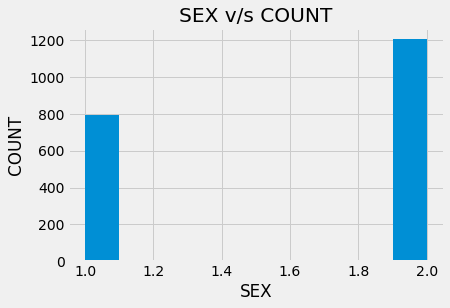

In [25]:
plt.style.use('fivethirtyeight')
df['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

**Number of Male credit holder is less than Female**

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

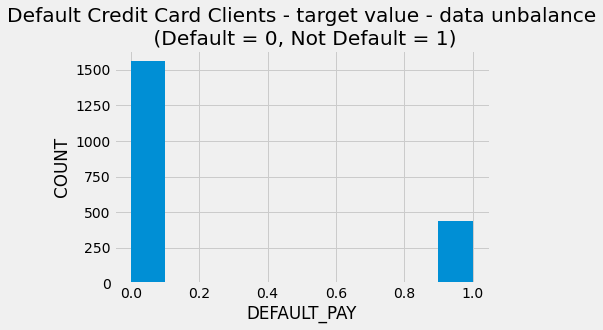

In [26]:
plt.style.use('fivethirtyeight')
df['def_pay'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

**Percentage of Defaulters are smaller than the Non Defaulters in the given dataset**

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

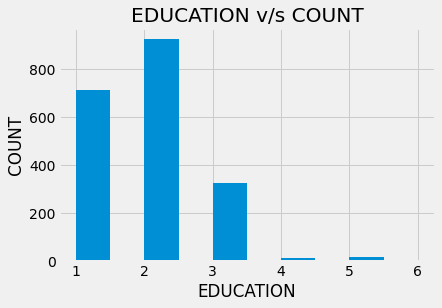

In [27]:
plt.style.use('fivethirtyeight')
df['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

**More number of credit holders are university students followed by Graduates and then High school students**

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

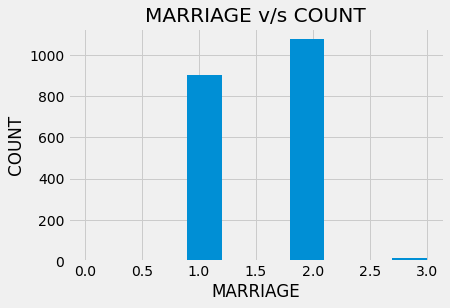

In [28]:
plt.style.use('fivethirtyeight')
df['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

**More number of credit cards holder are Married**

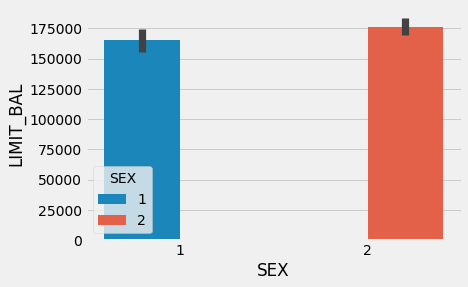

In [29]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=df,hue='SEX')
plt.show()

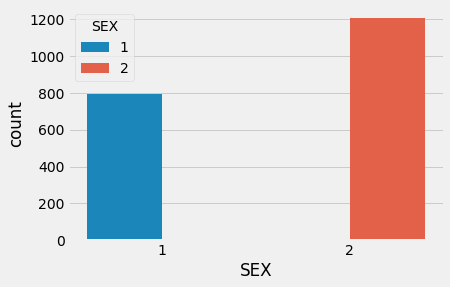

In [30]:
sns.countplot(x='SEX',data=df,hue = 'SEX')
plt.show()

**Checking the number of counts of defaulters and non defaulters sexwise**
 

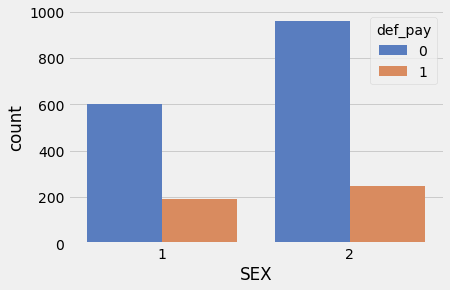

In [31]:
sns.countplot(x='SEX', data=df,hue="def_pay", palette="muted")
plt.show()

**It is evident from the above output that females have overall less default payments wrt males**

**Non-Defaults have a higher proportion of Females (Sex=2)**

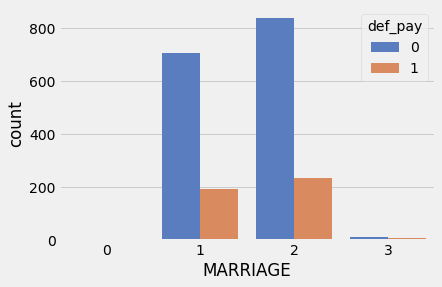

In [32]:
g=sns.countplot(x="MARRIAGE", data=df,hue="def_pay", palette="muted")

**From the above plot it is clear that those people who have marital status single have less default payment wrt married status people**

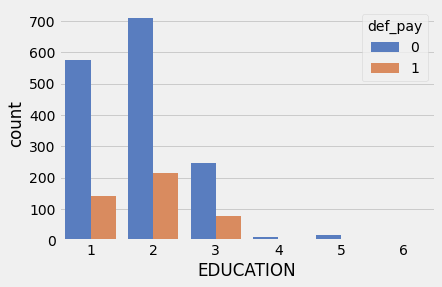

In [33]:
g=sns.countplot(x="EDUCATION", data=df,hue="def_pay", palette="muted")

**From the above plot it is clear that those people who are university students have less default payment wrt graduates and high school people**

In [34]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

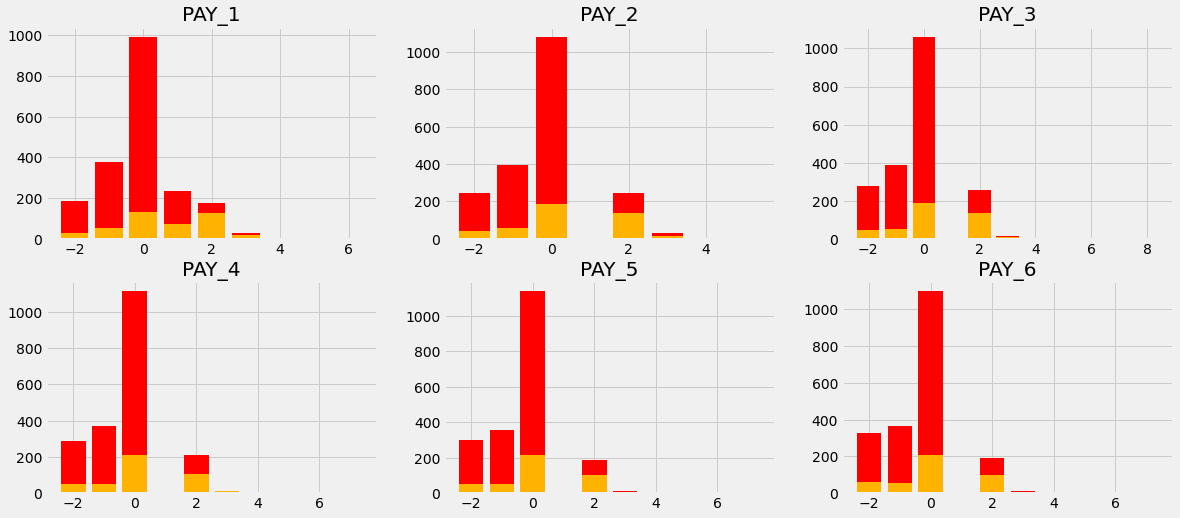

In [35]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])

**The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.**

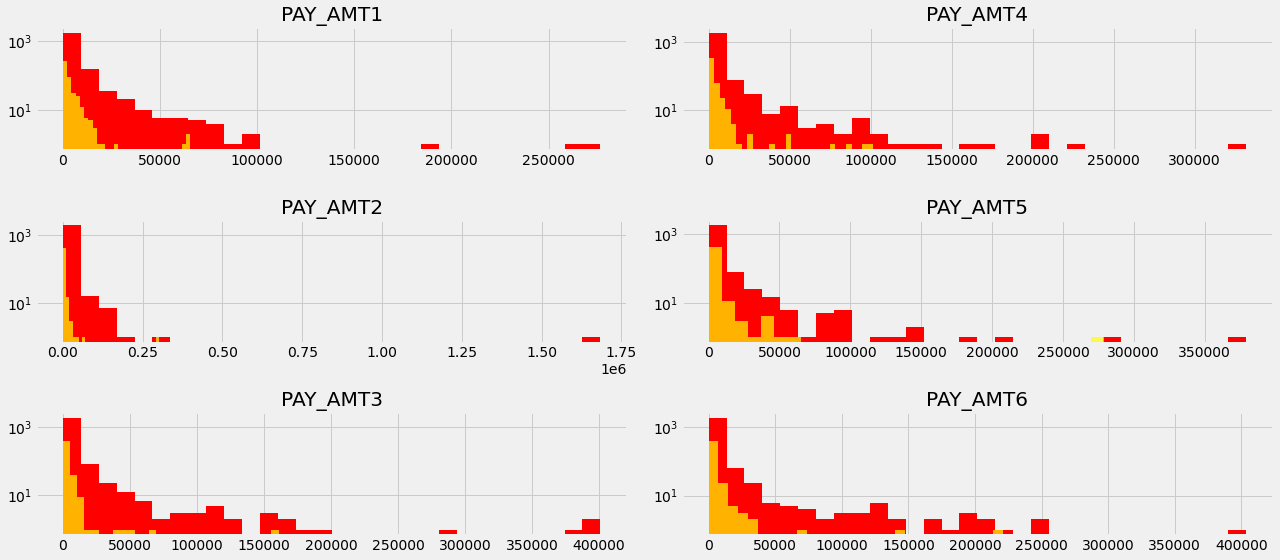

In [36]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='red')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['def_pay']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log')
plt.tight_layout()
plt.show()

**The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters**

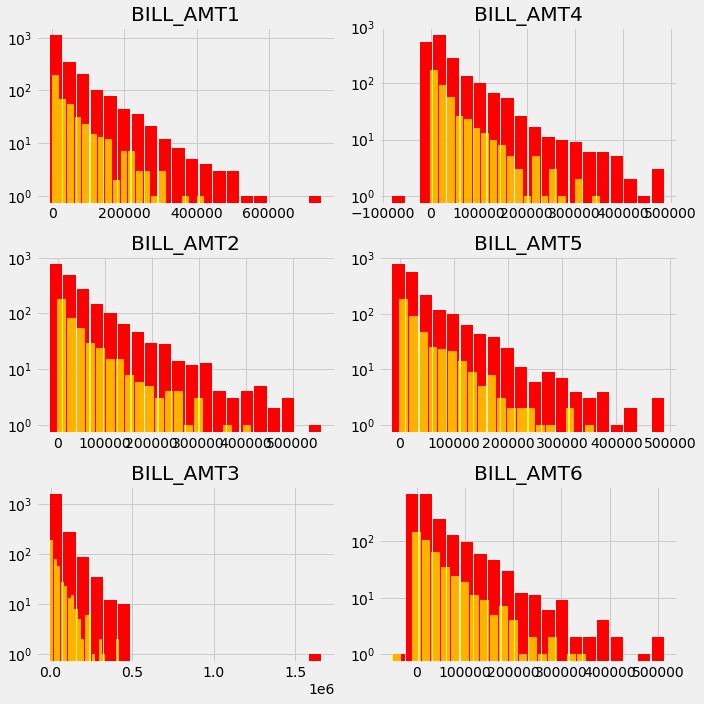

In [37]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[bill_atm_columns[i]], 20,rwidth=0.9, color ='red')
    ax[row,col].hist(df[bill_atm_columns[i]][(df['def_pay']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log')
plt.tight_layout()
plt.show()

**The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters**

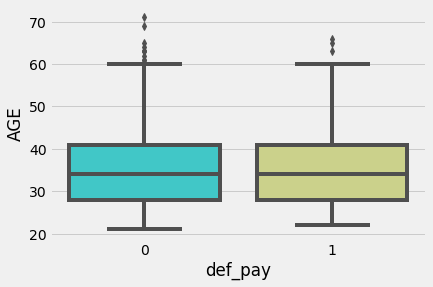

In [38]:
sns.boxplot(x='def_pay',y='AGE',data=df,palette='rainbow')
plt.show()

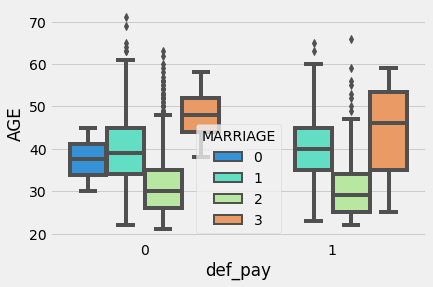

In [39]:
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=df,palette="rainbow")
plt.show()

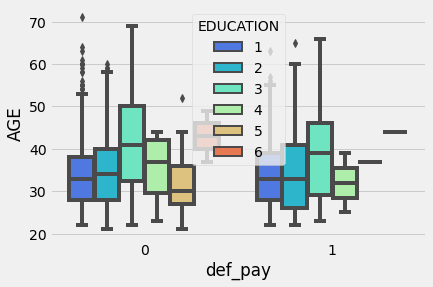

In [40]:
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=df,palette="rainbow" )
plt.show()

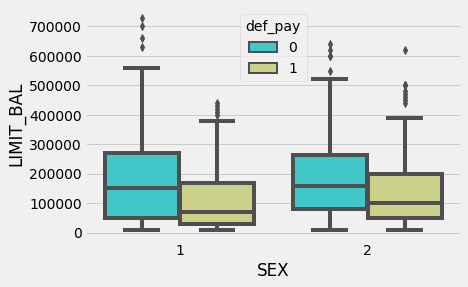

In [41]:
sns.boxplot(x='SEX',hue='def_pay', y='LIMIT_BAL',data=df,palette="rainbow")
plt.show()

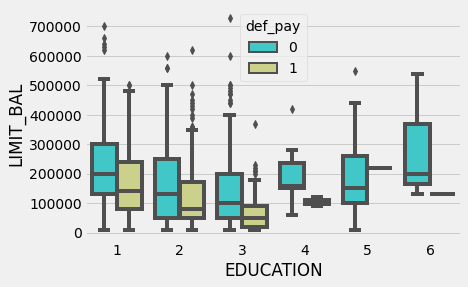

In [42]:
sns.boxplot(x='EDUCATION',hue='def_pay', y='LIMIT_BAL',data=df,palette="rainbow")
plt.show()

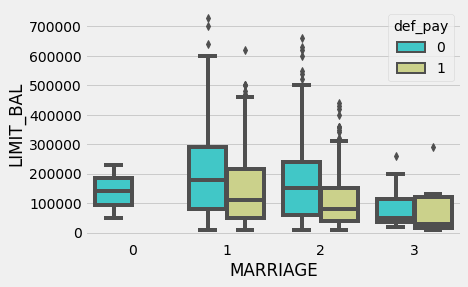

In [43]:
sns.boxplot(x='MARRIAGE',hue='def_pay', y='LIMIT_BAL',data=df,palette="rainbow")
plt.show()

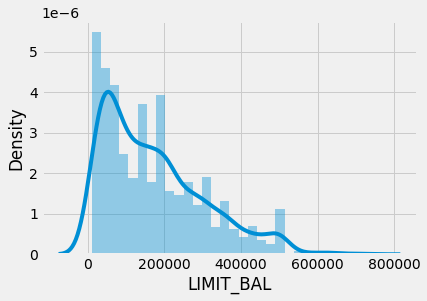

In [44]:
sns.distplot(df['LIMIT_BAL'],kde=True,bins=30)
plt.show()

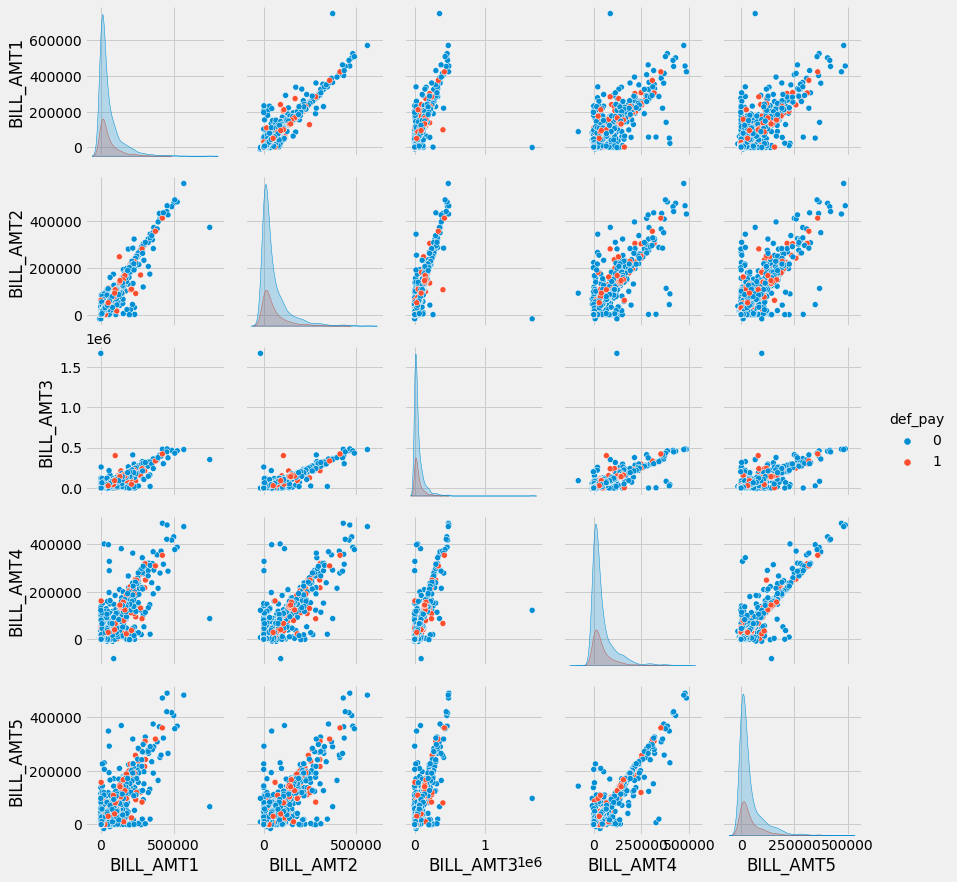

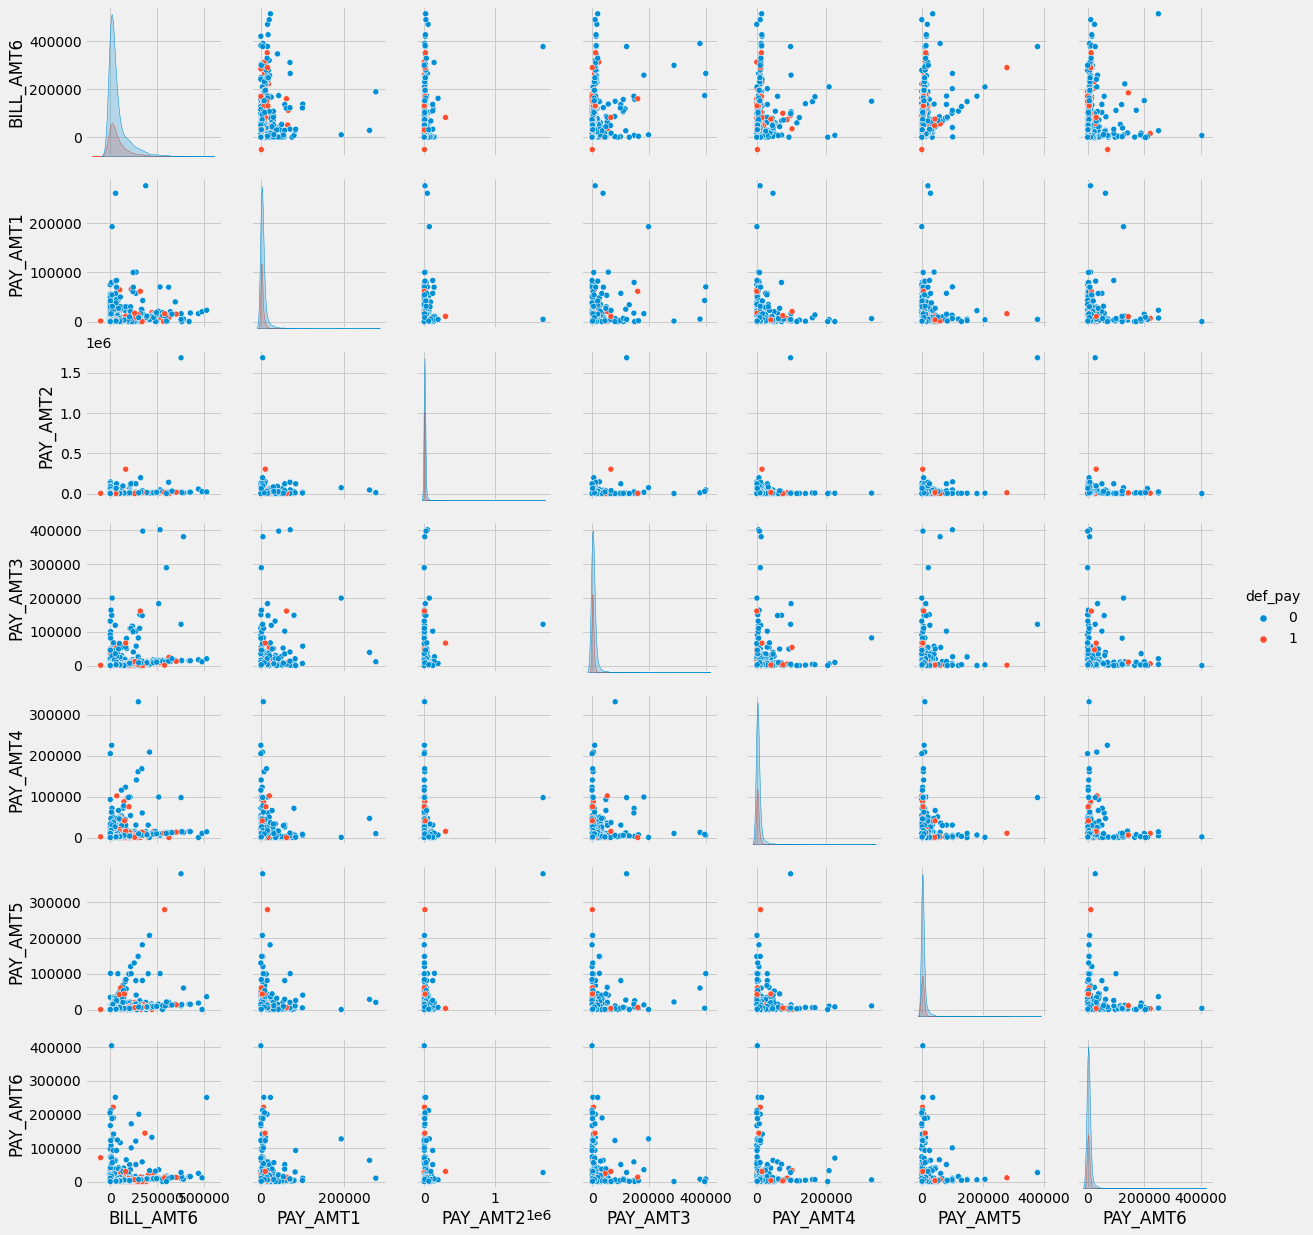

In [45]:
# plot columns with similar names to check the correlation
sns.pairplot(df, vars=df.columns[12:17], kind='scatter',hue= 'def_pay')
sns.pairplot(df, vars=df.columns[17:24],kind='scatter',hue = 'def_pay')
plt.show()

**Observing Correlation between features of the Dataset**

In [46]:
correlation = df.corr()

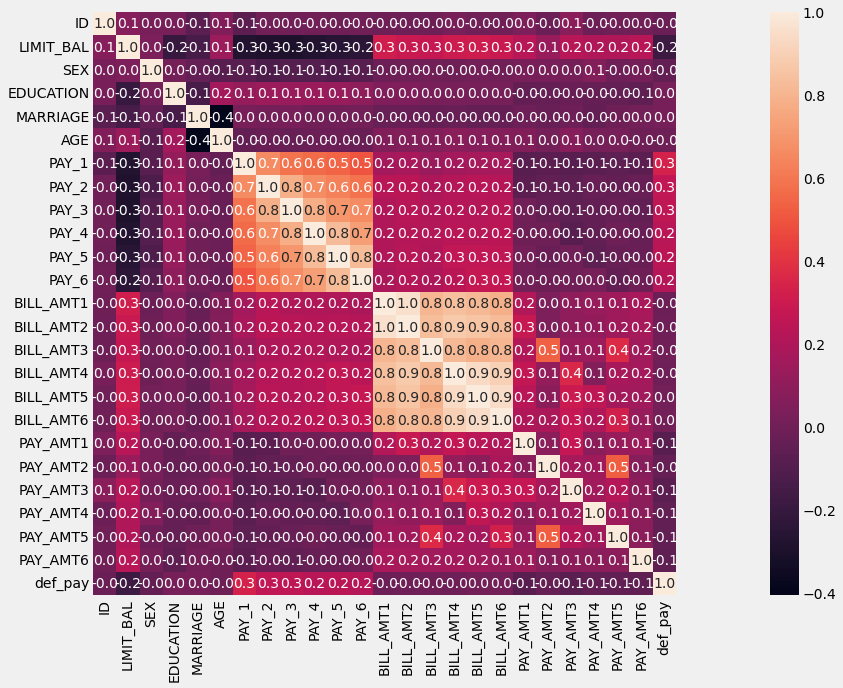

In [47]:
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )  
plt.show()

**So it looks like the PAY_0, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.**

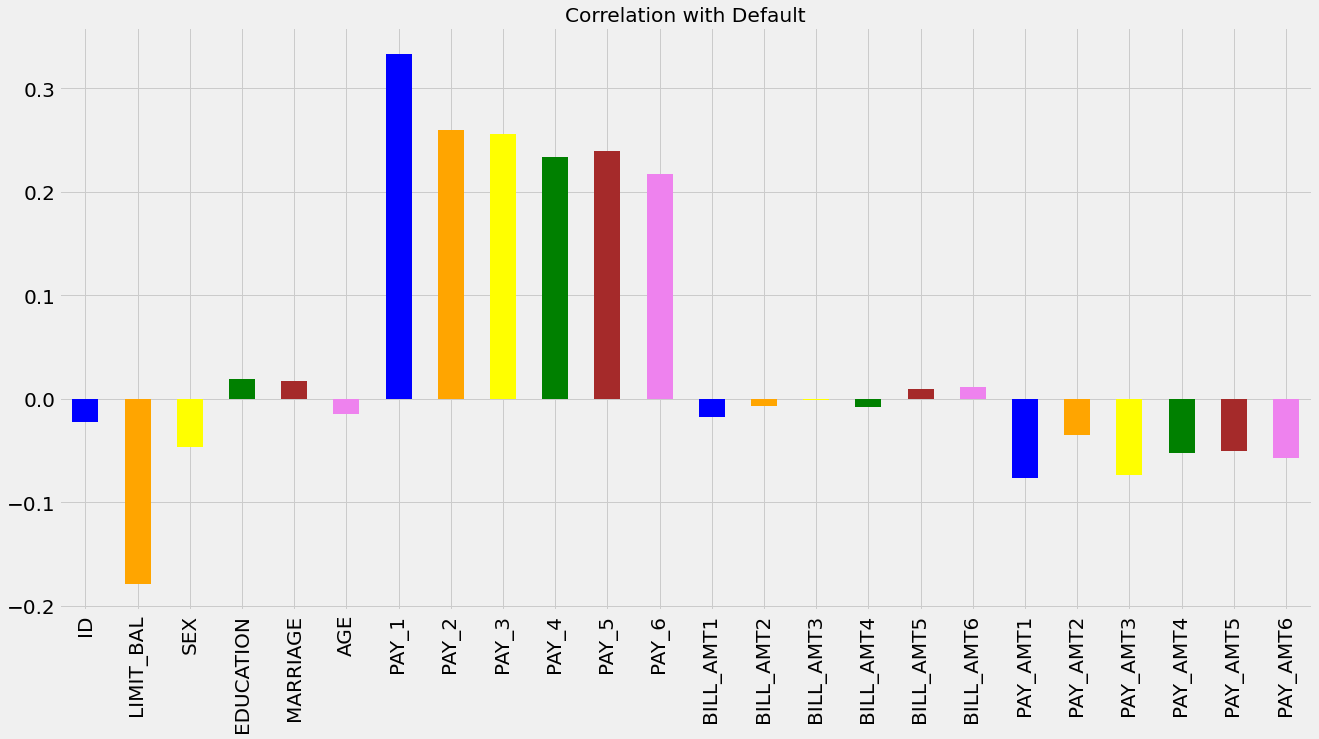

In [48]:
X = df.drop(['def_pay'],axis=1)
X.corrwith(df['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True,
                                        color=['blue','orange','yellow','green','brown','violet'])
plt.show()

**It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.**

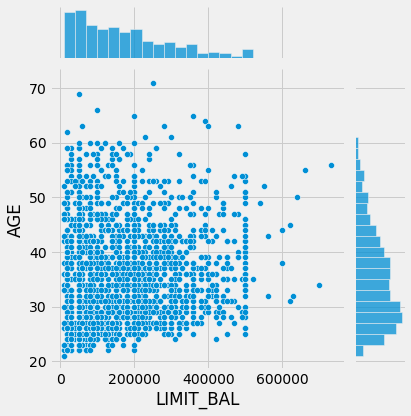

In [49]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=df,kind="scatter")
plt.show()

**Facet Grid**

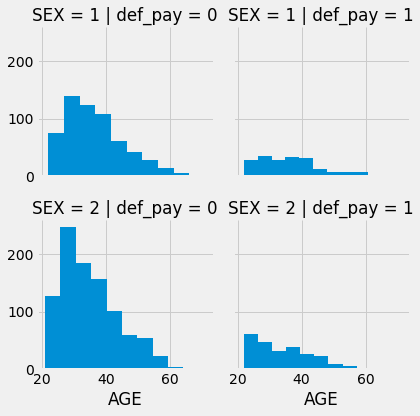

In [50]:
g = sns.FacetGrid(df, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')
plt.show()

**From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of people 30-40years**

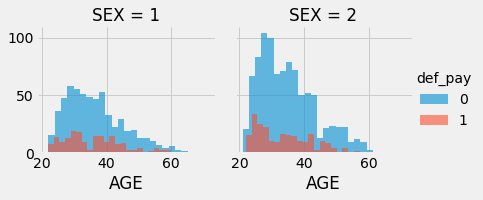

In [51]:
g = sns.FacetGrid(df, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()
plt.show()

**From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of Female age between 30-40years**

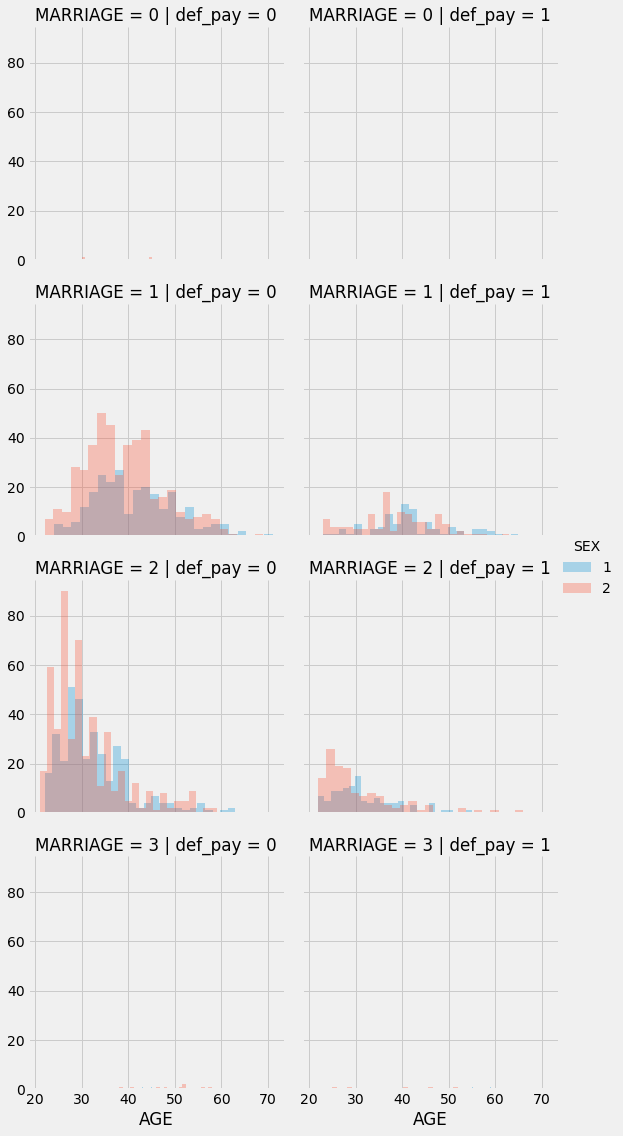

In [52]:
g = sns.FacetGrid(df, col='def_pay', row= "MARRIAGE", hue='SEX',size=4)
g.map(plt.hist, 'AGE', alpha=0.3,bins=25)
g.add_legend()
plt.show()

# step3:Data cleaning

**EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.**

**MARRIAGE has a label 0 that is undocumented**

**Data Transformation**

**The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).**

**The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)**

In [45]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    925
1    715
3    325
4     35
Name: EDUCATION, dtype: int64

In [46]:
df['EDUCATION'].value_counts(dropna = False)

2    925
1    715
3    325
4     35
Name: EDUCATION, dtype: int64

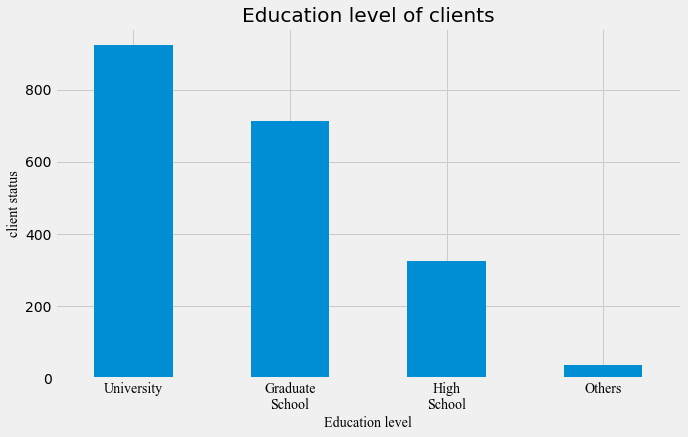

In [47]:
if SHOW_FIGURE :
    # 1=graduate school, 2=university, 3=high school 4=others
    df['EDUCATION'].value_counts().plot(kind='bar', figsize=(10,6))
    plt.title("Education level of clients")
    plt.xticks([0,1,2,3],['University','Graduate\nSchool', 'High\nSchool', 'Others'],fontproperties=font,rotation=0)
    plt.xlabel('Education level', fontproperties=font)
    plt.ylabel('client status', fontproperties=font)
    plt.show()

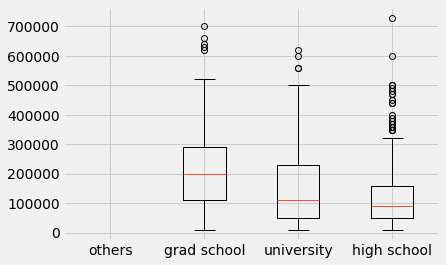

In [48]:
# Use boxplot to visualize credit limit grouped by education level

data = []
for i in [0,1,2,3]:
    temp = df.loc[df.EDUCATION == i, "LIMIT_BAL"]
    data.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()

In [49]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    1076
1     904
3      20
Name: MARRIAGE, dtype: int64

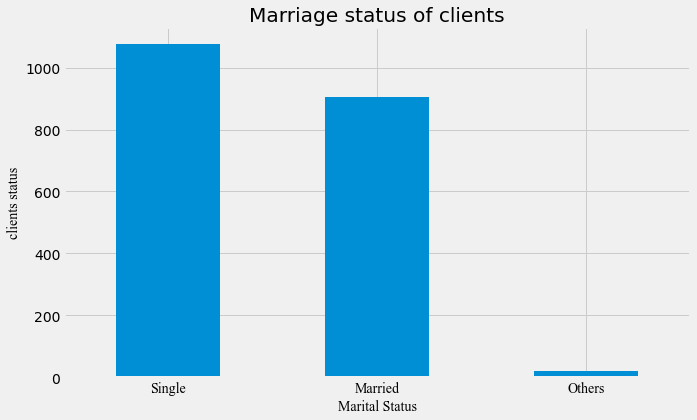

In [50]:
if SHOW_FIGURE :
    # 1=married, 2=single, 3=others
    df['MARRIAGE'].value_counts().plot(kind='bar', figsize=(10,6))
    plt.title("Marriage status of clients")
    plt.xticks([0,1,2],['Single','Married', 'Others'],fontproperties=font,rotation=0)
    plt.xlabel('Marital Status', fontproperties=font)
    plt.ylabel('clients status', fontproperties=font)
    plt.show()

In [51]:
fil = (df.PAY_1 == -1) | (df.PAY_1==-2)
df.loc[fil,'PAY_1']=0
df.PAY_1.value_counts()
fil = (df.PAY_2 == -1) | (df.PAY_2==-2)
df.loc[fil,'PAY_2']=0
df.PAY_2.value_counts()
fil = (df.PAY_3 == -1) | (df.PAY_3==-2)
df.loc[fil,'PAY_3']=0
df.PAY_3.value_counts()
fil = (df.PAY_4 == -1) | (df.PAY_4==-2)
df.loc[fil,'PAY_4']=0
df.PAY_4.value_counts()
fil = (df.PAY_5 == -1) | (df.PAY_5==-2)
df.loc[fil,'PAY_5']=0
df.PAY_5.value_counts()
fil = (df.PAY_6 == -1) | (df.PAY_6==-2)
df.loc[fil,'PAY_6']=0
df.PAY_6.value_counts()

0    1788
2     190
3      10
4       5
7       3
5       2
6       2
Name: PAY_6, dtype: int64

In [52]:
# Payment delay description
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

PAY_1        PAY_2        PAY_3       PAY_4        PAY_5  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean      0.349000     0.303000     0.291500     0.25800     0.228500   
std       0.734485     0.771679     0.765389     0.76271     0.720796   
min       0.000000     0.000000     0.000000     0.00000     0.000000   
25%       0.000000     0.000000     0.000000     0.00000     0.000000   
50%       0.000000     0.000000     0.000000     0.00000     0.000000   
75%       0.000000     0.000000     0.000000     0.00000     0.000000   
max       6.000000     5.000000     8.000000     7.00000     7.000000   

             PAY_6  
count  2000.000000  
mean      0.236500  
std       0.737455  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       7.000000

In [53]:
# REPAYMENT STATUS = -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above
for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']: 
  print(f"# {att} -------")
  print(df[att].value_counts())

# PAY_1 -------
0    1556
1     233
2     177
3      29
4       3
6       2
Name: PAY_1, dtype: int64
# PAY_2 -------
0    1719
2     243
3      29
4       4
5       3
1       2
Name: PAY_2, dtype: int64
# PAY_3 -------
0    1726
2     254
3      13
4       5
8       2
Name: PAY_3, dtype: int64
# PAY_4 -------
0    1767
2     209
3      14
7       5
4       4
5       1
Name: PAY_4, dtype: int64
# PAY_5 -------
0    1793
2     187
3      11
7       4
4       4
6       1
Name: PAY_5, dtype: int64
# PAY_6 -------
0    1788
2     190
3      10
4       5
7       3
5       2
6       2
Name: PAY_6, dtype: int64


In [54]:
# since PAY_n can take as values only -1,1,2,3,4,5,6,7,8,9
for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  # categories -2,-1 are grouped into a single class -1: pay duty   
  filter = (df[att] == -2) | (df[att] == -1) 
  df.loc[filter, att] = -1
  print(df[att].unique())
  # moreover the category 0 is undocumented
  # so each category >= 0 has been updated by adding 1
  df[att] = df[att].astype('int64')
  filter = (df[att] >= 0)
  df.loc[filter, att] = df.loc[filter, att] + 1
  print(df[att].unique())
  print("##############################################")

[0 2 1 3 4 6]
[1 3 2 4 5 7]
##############################################
[0 2 3 5 1 4]
[1 3 4 6 2 5]
##############################################
[0 3 2 4 8]
[1 4 3 5 9]
##############################################
[0 3 2 4 7 5]
[1 4 3 5 8 6]
##############################################
[0 2 3 7 4 6]
[1 3 4 8 5 7]
##############################################
[0 2 3 5 7 4 6]
[1 3 4 6 8 5 7]
##############################################


In [55]:
# Payment delay description
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

PAY_1        PAY_2        PAY_3       PAY_4        PAY_5  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean      1.349000     1.303000     1.291500     1.25800     1.228500   
std       0.734485     0.771679     0.765389     0.76271     0.720796   
min       1.000000     1.000000     1.000000     1.00000     1.000000   
25%       1.000000     1.000000     1.000000     1.00000     1.000000   
50%       1.000000     1.000000     1.000000     1.00000     1.000000   
75%       1.000000     1.000000     1.000000     1.00000     1.000000   
max       7.000000     6.000000     9.000000     8.00000     8.000000   

             PAY_6  
count  2000.000000  
mean      1.236500  
std       0.737455  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       8.000000

In [56]:
# REPAYMENT STATUS = -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above
for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']: 
  print(f"# {att} -------")
  print(df[att].value_counts())

# PAY_1 -------
1    1556
2     233
3     177
4      29
5       3
7       2
Name: PAY_1, dtype: int64
# PAY_2 -------
1    1719
3     243
4      29
5       4
6       3
2       2
Name: PAY_2, dtype: int64
# PAY_3 -------
1    1726
3     254
4      13
5       5
9       2
Name: PAY_3, dtype: int64
# PAY_4 -------
1    1767
3     209
4      14
8       5
5       4
6       1
Name: PAY_4, dtype: int64
# PAY_5 -------
1    1793
3     187
4      11
8       4
5       4
7       1
Name: PAY_5, dtype: int64
# PAY_6 -------
1    1788
3     190
4      10
5       5
8       3
6       2
7       2
Name: PAY_6, dtype: int64


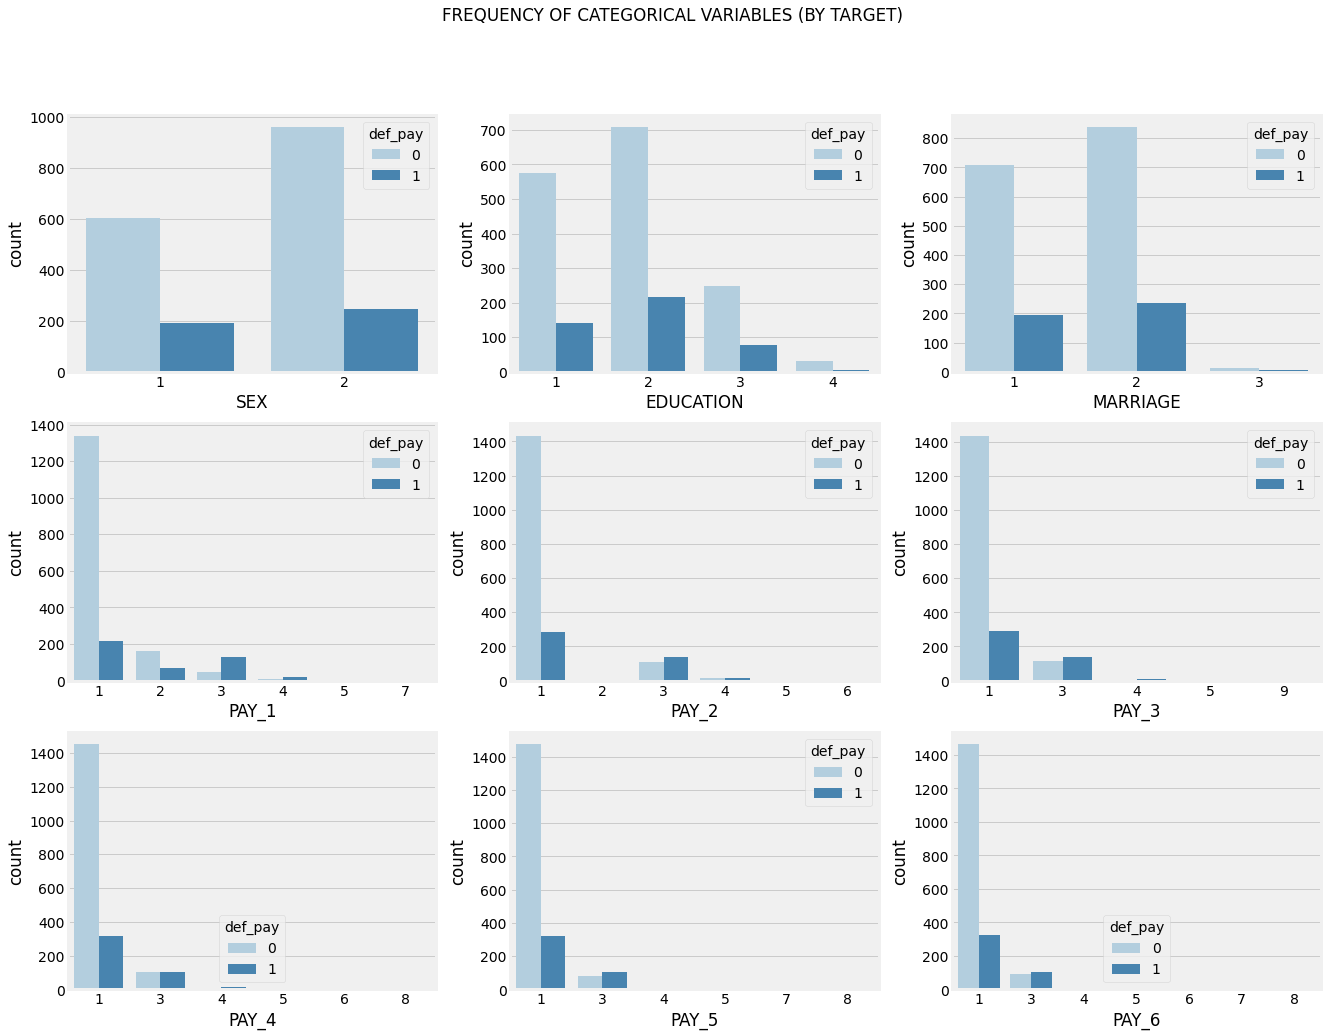

In [57]:
if SHOW_FIGURE :
    # Creating a new dataframe with categorical variables
    subset = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'def_pay']]

    f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
    f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
    ax1 = sns.countplot(x="SEX", hue="def_pay", data=subset, palette="Blues", ax=axes[0,0])
    ax2 = sns.countplot(x="EDUCATION", hue="def_pay", data=subset, palette="Blues",ax=axes[0,1])
    ax3 = sns.countplot(x="MARRIAGE", hue="def_pay", data=subset, palette="Blues",ax=axes[0,2])
    ax4 = sns.countplot(x="PAY_1", hue="def_pay", data=subset, palette="Blues", ax=axes[1,0])
    ax5 = sns.countplot(x="PAY_2", hue="def_pay", data=subset, palette="Blues", ax=axes[1,1])
    ax6 = sns.countplot(x="PAY_3", hue="def_pay", data=subset, palette="Blues", ax=axes[1,2])
    ax7 = sns.countplot(x="PAY_4", hue="def_pay", data=subset, palette="Blues", ax=axes[2,0])
    ax8 = sns.countplot(x="PAY_5", hue="def_pay", data=subset, palette="Blues", ax=axes[2,1])
    ax9 = sns.countplot(x="PAY_6", hue="def_pay", data=subset, palette="Blues", ax=axes[2,2]);

In [58]:
# Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count    2000.000000  2.000000e+03    2000.000000    2000.000000   
mean     5153.111500  6.362411e+03    6096.214000    5091.073500   
std     13065.162427  4.014712e+04   21880.625777   16197.840731   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1000.000000  9.947500e+02     445.500000     328.250000   
50%      2022.500000  2.031500e+03    1843.000000    1597.500000   
75%      5000.000000  5.000000e+03    5000.000000    4295.500000   
max    276698.000000  1.684259e+06  400972.000000  331788.000000   

            PAY_AMT5       PAY_AMT6  
count    2000.000000    2000.000000  
mean     5043.292500    5738.555500  
std     16448.820691   21310.318739  
min         0.000000       0.000000  
25%       260.250000     166.750000  
50%      1500.000000    1464.000000  
75%      4207.750000    4000.000000  
max    379267.000000  403500.000000

In [59]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count    2000.000000    2000.000000  2.000000e+03    2000.000000   
mean    53341.091500   50172.804500  4.823936e+04   44390.095500   
std     76676.065104   72959.306173  7.850584e+04   65827.281839   
min     -8187.000000  -18088.000000 -9.032000e+03  -81334.000000   
25%      3974.750000    3057.750000  3.048500e+03    2939.500000   
50%     23410.000000   21378.500000  2.046300e+04   19454.000000   
75%     70972.500000   65359.500000  6.056850e+04   53394.250000   
max    746814.000000  562316.000000  1.664089e+06  487066.000000   

           BILL_AMT5      BILL_AMT6  
count    2000.000000    2000.000000  
mean    41502.586000   39643.917000  
std     61928.132672   60472.016246  
min    -15306.000000  -51443.000000  
25%      2158.750000    1319.250000  
50%     18652.000000   17621.500000  
75%     51005.500000   49484.750000  
max    489200.000000  513798.000000

In [60]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

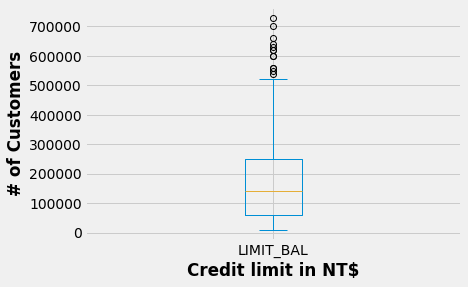

In [61]:
# Use boxplot to identify any outlier in credit limit

df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

In [62]:
IQR=df.LIMIT_BAL.quantile(0.75)-df.LIMIT_BAL.quantile(0.25)

In [63]:
df=df.loc[(df.LIMIT_BAL>(df.LIMIT_BAL.quantile(0.25)-1.5*IQR))&
          (df.LIMIT_BAL<(df.LIMIT_BAL.quantile(0.75)+1.5*IQR)),:]

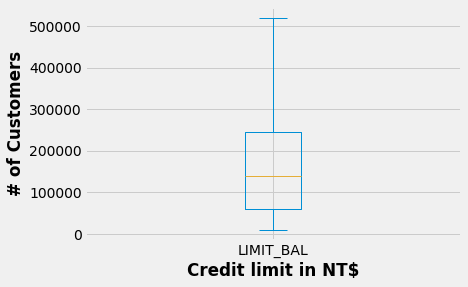

In [64]:
# boxplot with outliers removed

df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

**Distribution of Credit Limit:**

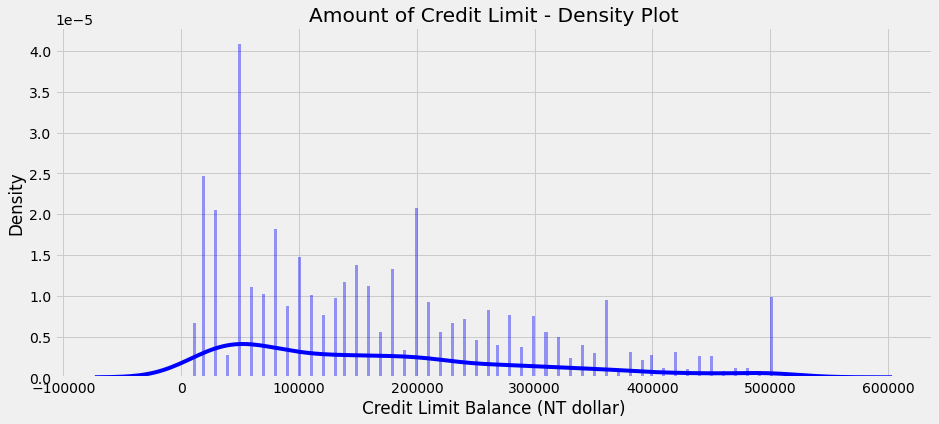

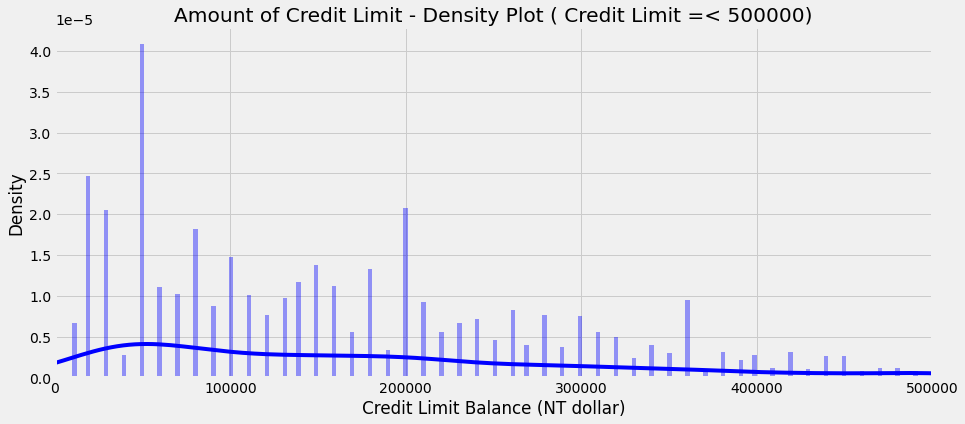

In [65]:
# Amount of credit limit

plt.figure(figsize = (14,6))
plt.title('Amount of Credit Limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df["LIMIT_BAL"],kde=True,bins=200, color="blue")
plt.xlabel('Credit Limit Balance (NT dollar)')
plt.ticklabel_format(axis='x',scilimits = (0,1000000))
plt.show()

# Closer look to the amount of credit limit (exclude outliers)

plt.figure(figsize = (14,6))
plt.title('Amount of Credit Limit - Density Plot ( Credit Limit =< 500000)')
sns.set_color_codes("pastel")
sns.distplot(df["LIMIT_BAL"],kde=True,bins=200, color="blue")
plt.xlabel('Credit Limit Balance (NT dollar)')
plt.ticklabel_format(axis='x',scilimits = (0,500000))
plt.xlim(0,500000) 
plt.show()

Text(0.5, 1.0, 'Default Credit Card Clients - Default Payment Next Month')

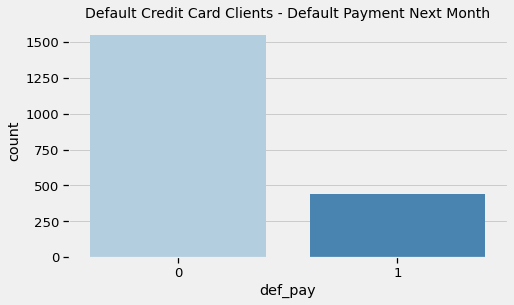

In [66]:
# The frequency of defaults
yes = df['def_pay'].sum()
no = len(df)-yes

# Percentage
yes_perc = round(yes/len(df)*100, 1)
no_perc = round(no/len(df)*100, 1)

plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('def_pay',data=df, palette="Blues")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('Default Credit Card Clients - Default Payment Next Month', size=14)

Text(0.5, 1.0, 'Credit Limit Balance Histogram by Default Payment Next Month')

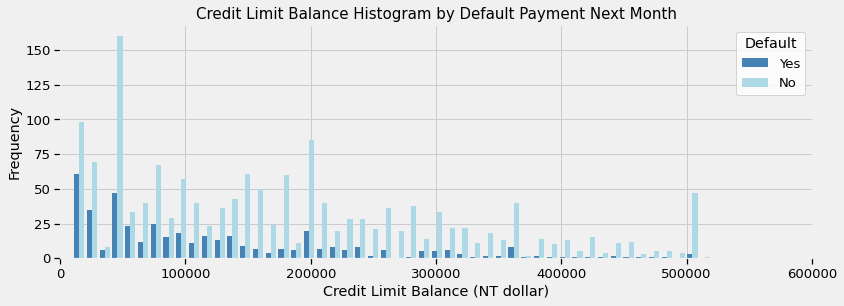

In [67]:
#Frequency of limit balance by default payment next month

x1 = list(df[df['def_pay'] == 1]['LIMIT_BAL'])
x2 = list(df[df['def_pay'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 50, density=False, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Credit Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('Credit Limit Balance Histogram by Default Payment Next Month', size=15)

**Payment Status by Month**

In [100]:
# History of past payment status

pay_s = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
df['PAY_1'].value_counts().index.to_list().sort()

fig = make_subplots(rows= 3, cols=2,subplot_titles=pay_s.columns.to_list())  

fig.add_trace(go.Histogram(x= df["PAY_1"],name='PAY_1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_2"],name='PAY_2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_3"],name='PAY_3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_4"],name='PAY_4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["PAY_5"],name='PAY_5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["PAY_6"],name='PAY_6'),row = 3, col = 2)


fig.update_layout(bargap=0.2,height=600, width=800, title_text="Histogram Subplots of Past Payment Status",showlegend=False)
fig.show()

# Most of clients pay the previous amount duly but there're only some of them who pay late

**Bill Amount**

In [99]:
# History of bill amount

pay_s = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
df['BILL_AMT1'].value_counts().index.to_list().sort()

fig = make_subplots(rows= 3, cols=2,subplot_titles=pay_s.columns.to_list())  

fig.add_trace(go.Histogram(x= df["BILL_AMT1"],name='BILL_AMT1'),row = 1, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT2"],name='BILL_AMT2'),row = 2, col = 2)
fig.add_trace(go.Histogram(x= df["BILL_AMT3"],name='BILL_AMT3'),row = 3, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT4"],name='BILL_AMT4'),row = 1, col = 2)
fig.add_trace(go.Histogram(x= df["BILL_AMT5"],name='BILL_AMT5'),row = 2, col = 1)
fig.add_trace(go.Histogram(x= df["BILL_AMT6"],name='BILL_AMT6'),row = 3, col = 2)


fig.update_layout(bargap=0.2,height=600, width=800, title_text="Histogram Subplots of Past Bill Amount",showlegend=False)
fig.show()

**Feature Engineering**

In [70]:
# Variable 'education': group the categories 0, 4, 5, 6 into a single class '0' (others)
# as the document describes 
df['EDUCATION']=np.where(df['EDUCATION'] == 4, 0, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 0, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 0, df['EDUCATION'])

In [72]:
categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4',
                   'PAY_5','PAY_6']
df[categorical_vars] = df[categorical_vars].astype(str)
df = pd.get_dummies(df,columns=categorical_vars,drop_first=True)
df.head()

ID  LIMIT_BAL  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
10747  10748   310000.0   32   172772.0   152397.0   110375.0    84373.0   
12573  12574    10000.0   49       32.0     -358.0     -748.0     1690.0   
29676  29677    50000.0   28      430.0        0.0    46257.0    45975.0   
8856    8857    80000.0   52    36649.0    39448.0    40101.0    40748.0   
21098  21099   270000.0   34    20979.0    17228.0    20924.0    22448.0   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  ...  PAY_5_4  PAY_5_5  PAY_5_7  \
10747    57779.0    14163.0    8295.0  ...        0        0        0   
12573     1138.0      930.0       0.0  ...        0        0        0   
29676     1300.0    43987.0       0.0  ...        0        0        0   
8856     39816.0    40607.0    3700.0  ...        1        0        0   
21098    15490.0    17343.0       0.0  ...        0        0        0   

       PAY_5_8  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  PAY_6_8  
10747        0        0        0        0        0        0        0  
12573        0        1        0        0        0        0        0  
29676        0        0        0        0        0        0        0  
8856         0        1        0        0        0        0        0  
21098        0        0        0        0        0        0        0  

[5 rows x 52 columns]

**Model Building:**

**i) Logistic Regression**

**ii) Naive Bayes**

**iii) K-Nearest Neighbours**

**iv) Decision Tree**

**v) Random Forest**


In [103]:
#### Step 1) Preprocess Data

# We will train our classifier with the following features:
# Numeric features to be scaled: LIMIT_BAL, AGE, PAY_X, BIL_AMTX, and PAY_AMTX
# Categorical features: SEX, EDUCATION, MARRIAGE

# We create the preprocessing pipelines for both numeric and categorical data
numeric_features = ['LIMIT_BAL', 'AGE',  
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
                   ]



# data['PAY_1'] = data.PAY_1.astype('float64')
# data['PAY_2'] = data.PAY_2.astype('float64')
# data['PAY_3'] = data.PAY_3.astype('float64')
# data['PAY_4'] = data.PAY_4.astype('float64')
# data['PAY_5'] = data.PAY_5.astype('float64')
# data['PAY_6'] = data.PAY_6.astype('float64')
df['AGE'] = df.AGE.astype('float64')

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(categories='auto', handle_unknown='ignore'))
])

In [104]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
        #,('lab', label_transformer, label_features)
    ])

In [105]:
def Conf_Matrix(CM, labels=['pay', 'default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [106]:
#### Step 2) Split Data into Training and Test Sets

y = df['def_pay']#.values
X = df.drop(['def_pay'], axis=1)#.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [107]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'AUC', 'Time to Train'], 
                       columns=['LR', 'KNN', 'SVM', 'DT', 'RF'])

**1st Model: Logistic Regression:**

It takes 6.296  seconds for Logistic Regression fitting
Accuracy with lr on testing set is: 0.820
PREDICTION  pay  default  Total
TRUE                           
pay         446       22    468
default      86       46    132
Total       532       68    600
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       468
           1       0.68      0.35      0.46       132

    accuracy                           0.82       600
   macro avg       0.76      0.65      0.68       600
weighted avg       0.80      0.82      0.80       600



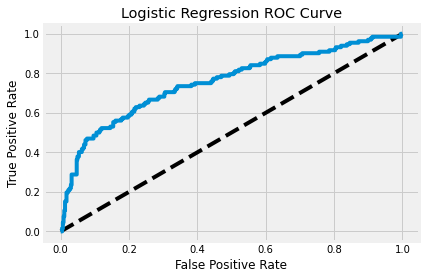

In [108]:
#### Step 3: Instantiate the Estimator

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
from sklearn.linear_model import LogisticRegression

lr = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', LogisticRegression(solver='liblinear', random_state=21))])

#### Step 4: Specify the Hyperparameter Space

param_grid_lr = {
    
    'classifier__C': np.logspace(-5, 8, 15),
    'classifier__penalty': ['l1', 'l2']
}

#### Step 5: Instantiate the CV Object

lr_cv = GridSearchCV(lr, param_grid_lr, cv=5,)

#### Step 6: Fit on Training

t0 = time.time()
lr_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for Logistic Regression fitting")
metrics.loc['Time to Train', 'LR'] = ttt

#### Step 7: Predict on Test

y_pred = lr_cv.predict(X_test)

#### Step 8: Scoring

##### Accuracy

print("Accuracy with lr on testing set is: %.3f" % lr_cv.score(X_test, y_test))
# Latest accuracy is 0.82

metrics.loc['accuracy', 'LR'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'LR'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'LR'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = lr_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'LR'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

**2nd Model: KNN**

It takes 0.924  seconds for KNN fitting
Accuracy with KNN on the test set is: 0.797
PREDICTION  pay  default  Total
TRUE                           
pay         449       19    468
default     103       29    132
Total       552       48    600
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       468
           1       0.60      0.22      0.32       132

    accuracy                           0.80       600
   macro avg       0.71      0.59      0.60       600
weighted avg       0.77      0.80      0.76       600



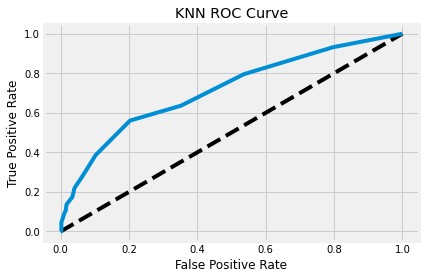

In [109]:
from sklearn.neighbors import KNeighborsClassifier

#3
knn = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', KNeighborsClassifier())])
#4
param_grid_knn = {
    'classifier__n_neighbors': np.arange(1,20)
}

#5
knn_cv = RandomizedSearchCV(knn, param_grid_knn, cv=3)

#6
t0 = time.time()
knn_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for KNN fitting")
metrics.loc['Time to Train', 'KNN'] = ttt

#7
y_pred = knn_cv.predict(X_test)

#8
print("Accuracy with KNN on the test set is: %.3f" % knn_cv.score(X_test, y_test))
# latest accuracy is 0.81

metrics.loc['accuracy', 'KNN'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'KNN'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'KNN'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = knn_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'KNN'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

**3nd Model: Support Vector Machine:**

In [110]:
from sklearn.svm import SVC
#3
svm = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SVC())])
#4
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01]
}

#5
svm_cv = RandomizedSearchCV(svm, param_grid_svm, cv=3)

#6
t0 = time.time()
svm_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for SVM fitting")
metrics.loc['Time to Train', 'SVM'] = ttt

#7
y_pred = svm_cv.predict(X_test)

#8
print("Accuracy with SVM on the test set is: %.3f" % svm_cv.score(X_test, y_test))

metrics.loc['accuracy', 'SVM'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'SVM'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'SVM'] = recall_score(y_pred=y_pred, y_true=y_test)

# SVC class doesn't have a predict_proba method
# y_pred_prob = svm_cv.predict_proba(X_test)[:,1]
# metrics.loc['AUC', 'SVM'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# No ROC Curve because no predict_proba method
# ROC Curve
# fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
# plt.plot([0,1], [0,1], 'k--')
# plt.plot(fpr, tpr, label='SVM')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('SVM ROC Curve')
# plt.show()

It takes 2.596  seconds for SVM fitting
Accuracy with SVM on the test set is: 0.827
PREDICTION  pay  default  Total
TRUE                           
pay         451       17    468
default      87       45    132
Total       538       62    600
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       468
           1       0.73      0.34      0.46       132

    accuracy                           0.83       600
   macro avg       0.78      0.65      0.68       600
weighted avg       0.81      0.83      0.80       600



**4th Model: Decision Tree**

It takes 1.830  seconds for dt fitting
Accuracy with dt on the test set is: 0.792
PREDICTION  pay  default  Total
TRUE                           
pay         439       29    468
default      96       36    132
Total       535       65    600
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       468
           1       0.55      0.27      0.37       132

    accuracy                           0.79       600
   macro avg       0.69      0.61      0.62       600
weighted avg       0.76      0.79      0.76       600



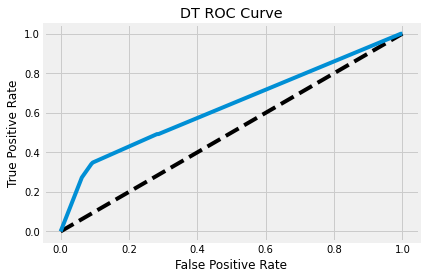

In [111]:
# Import necessary modules 
from sklearn.tree import DecisionTreeClassifier

#3
dt = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DecisionTreeClassifier(random_state=21))])
#4
# Setup the parameters and distributions to sample from: param_dist
param_grid_dt = {'classifier__max_depth': [3, 10, 20, None],
                'classifier__max_features': randint(1, 9),
                'classifier__min_samples_leaf': randint(1, 9),
                'classifier__min_samples_split': randint(2, 9),
                'classifier__criterion': ["gini", "entropy"]}

#5
dt_cv = RandomizedSearchCV(dt, param_grid_dt, cv=10)

#6
t0 = time.time()
dt_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for dt fitting")
metrics.loc['Time to Train', 'DT'] = ttt

#7
y_pred = dt_cv.predict(X_test)

#8
print("Accuracy with dt on the test set is: %.3f" % dt_cv.score(X_test, y_test))

metrics.loc['accuracy', 'DT'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'DT'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'DT'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = dt_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'DT'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve')
plt.show()

**5th Model: RandomForest:**

It takes 15.806  seconds for rf fitting
Accuracy with RF on the test set is: 0.808
PREDICTION  pay  default  Total
TRUE                           
pay         451       17    468
default      98       34    132
Total       549       51    600
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       468
           1       0.67      0.26      0.37       132

    accuracy                           0.81       600
   macro avg       0.74      0.61      0.63       600
weighted avg       0.79      0.81      0.77       600



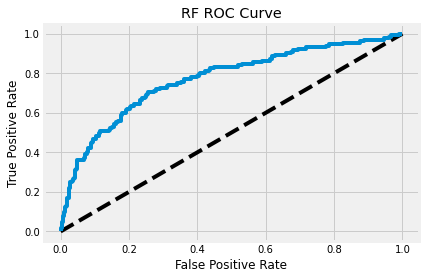

In [112]:
# Import necessary modules 

from sklearn.ensemble import RandomForestClassifier

#3
rf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier())])
#4
# Setup the parameters and distributions to sample from: param_dist
param_grid_rf = {'classifier__n_estimators': [50, 100],
                'classifier__criterion': ["gini", "entropy"],
                 'classifier__max_depth': [3, 10, 20, None],
                 'classifier__min_samples_leaf': randint(1, 9),
                 'classifier__min_samples_split': randint(2, 9),
                 'classifier__max_features': randint(1, 9)
                }

#5
rf_cv = RandomizedSearchCV(rf, param_grid_rf, cv=10)

#6
t0 = time.time()
rf_cv.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for rf fitting")
metrics.loc['Time to Train', 'RF'] = ttt

#7
y_pred = rf_cv.predict(X_test)

#8
print("Accuracy with RF on the test set is: %.3f" % rf_cv.score(X_test, y_test))

metrics.loc['accuracy', 'RF'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'RF'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'RF'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = rf_cv.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'RF'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve')
plt.show()

**6th Model: Naive Bayes**

It takes 0.016  seconds for nb fitting
Accuracy with nb on the test set is: 0.797
PREDICTION  pay  default  Total
TRUE                           
pay         430       38    468
default      84       48    132
Total       514       86    600
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       468
           1       0.56      0.36      0.44       132

    accuracy                           0.80       600
   macro avg       0.70      0.64      0.66       600
weighted avg       0.78      0.80      0.78       600



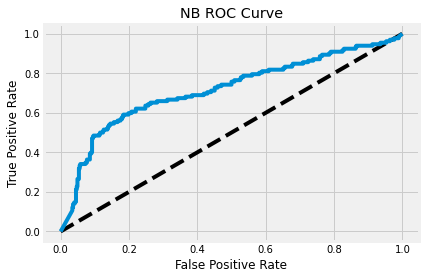

In [113]:
# Import necessary modules 

from sklearn.naive_bayes import GaussianNB

#3
nb = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', GaussianNB())])

#6
t0 = time.time()
nb.fit(X_train, y_train)
ttt = time.time() - t0 # ttt stands for "time to train"
print("It takes %.3f" % ttt, " seconds for nb fitting")
metrics.loc['Time to Train', 'NB'] = ttt

#7
y_pred = nb.predict(X_test)

#8
print("Accuracy with nb on the test set is: %.3f" % nb.score(X_test, y_test))

metrics.loc['accuracy', 'NB'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics.loc['precision', 'NB'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics.loc['recall', 'NB'] = recall_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = nb.predict_proba(X_test)[:,1]
metrics.loc['AUC', 'NB'] = roc_auc_score(y_test, y_pred_prob)

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


# ROC Curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB ROC Curve')
plt.show()

**Comparing the Models:**

In [114]:
from pandas.plotting import table

In [119]:
metrics.astype(float).round(3)*100

LR   KNN    SVM     DT      RF    NB
accuracy        82.0  79.7   82.7   79.2    80.8  79.7
precision       67.6  60.4   72.6   55.4    66.7  55.8
recall          34.8  22.0   34.1   27.3    25.8  36.4
AUC             75.5  71.4    NaN   63.3    77.0  71.7
Time to Train  629.6  92.4  259.6  183.0  1580.6   1.6

In [116]:
actual_metrics = metrics.astype(float).round(3).loc[['accuracy', 'precision', 'recall', 'AUC']]*100

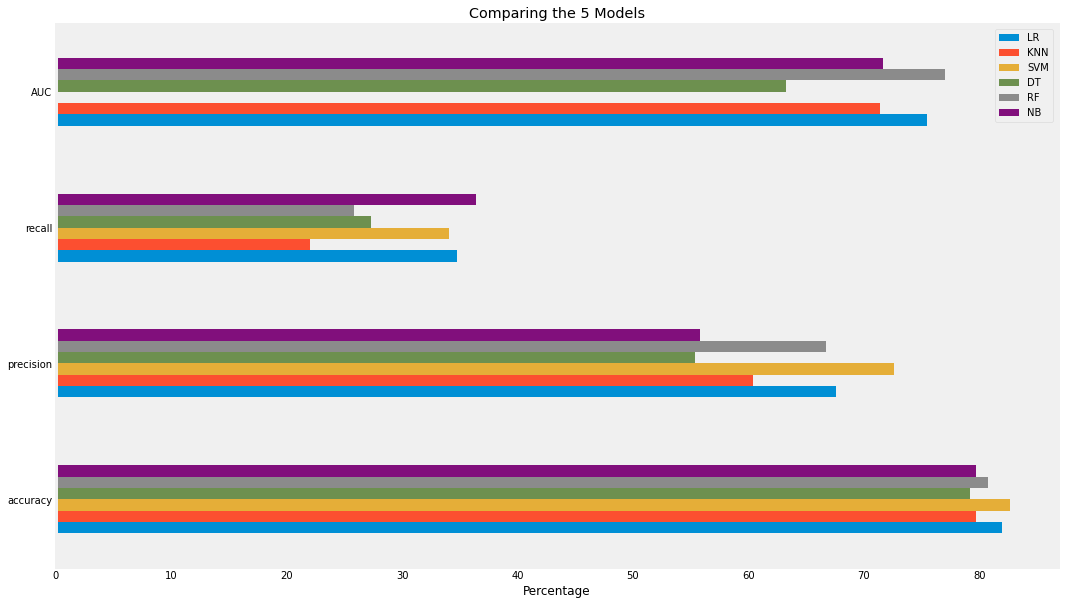

In [118]:
fig, ax = plt.subplots(figsize=(16,10))
actual_metrics.plot(kind='barh', ax=ax)
ax.set_xlabel('Percentage')
ax.set_title('Comparing the 5 Models')
ax.grid();
fig.savefig('comparisons')

**From the above plot it is clear that the Support Vector Machine 82.7% and Logistic Regression 82.0% has the best accuracy.**

